In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
labels=["Non Fraud","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Non Fraud transactions")
fig.show()

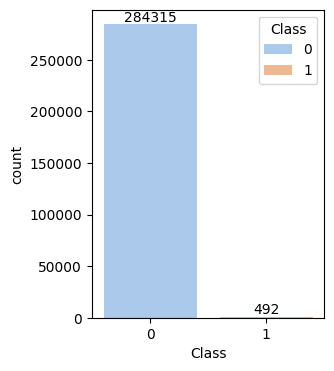

In [7]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel", hue="Class")
for i in ax.containers:
    ax.bar_label(i,)

In [8]:
print('Non Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [9]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [12]:
def Standard_Scaler(temp_df, temp_cols):
    scaler = StandardScaler()
    scaler.fit(temp_df[temp_cols])
    temp_df[temp_cols] = scaler.transform(temp_df[temp_cols])
    return temp_df

In [13]:
col_names = ['Amount', 'Time']
X_train = Standard_Scaler(X_train, col_names)
X_test = Standard_Scaler(X_test, col_names)

In [14]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2557,-1.951441,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,...,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,-0.339748,0
247823,1.241812,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,...,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,4.277740,0
152342,0.053397,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,...,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,-0.053399,0
103385,-0.550194,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,...,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,-0.335956,0
8771,-1.744044,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,...,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,-0.199244,0


In [15]:
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = under_sampling.fit_resample(X_train, y_train)


In [16]:
under_sample_df = pd.concat([X_train_under, y_train_under], axis=1)

labels=["Non Fraud","Fraud"]

fraud_or_not = under_sample_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=under_sample_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Non Fraud transactions")
fig.show()
    

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)


LogisticRegression()

In [18]:
lg_pred = log_reg.predict(X_test)

The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443
 

The confusion matrix is below : 


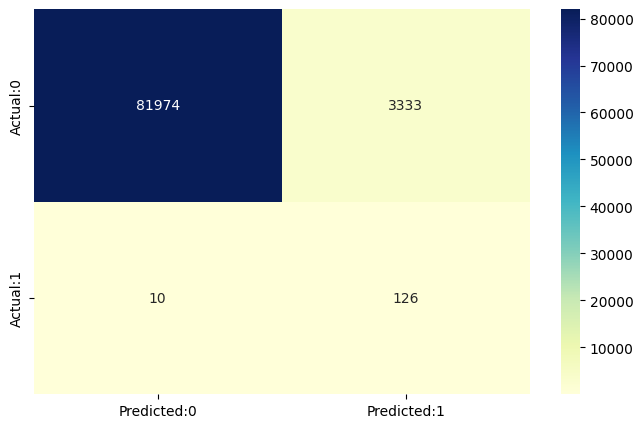

In [19]:
lg_report = classification_report(y_test, lg_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', lg_report, '\n')

#------------------------------------------------------------------------------

print('The confusion matrix is below : ')
cm=confusion_matrix(y_test, lg_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [20]:
roc_auc_score(y_test, lg_pred)

0.9436999687633385

# Over Sampling with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy='minority')
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [22]:
lg_sm = LogisticRegression(max_iter=1000)
lg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [23]:
lg_sm_pred = lg_sm.predict(X_test)


The classification report of Logistic Regressor after SMOTE is below :  


               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443
 

The confusion matrix is below : 


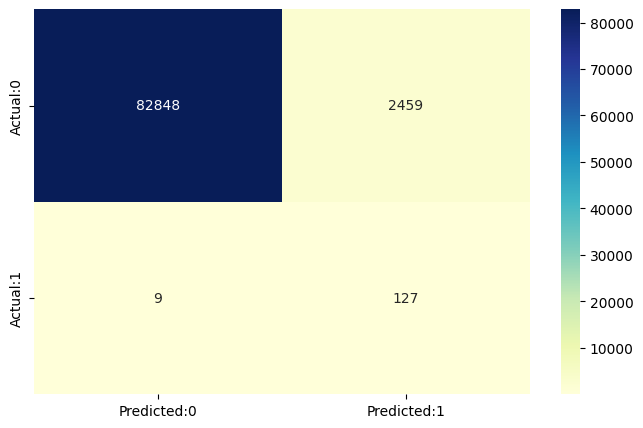

In [24]:
lg_sm_report = classification_report(y_test, lg_sm_pred)
print('The classification report of Logistic Regressor after SMOTE is below : ', '\n\n\n', lg_sm_report, '\n')

#------------------------------------------------------------------------------
print('The confusion matrix is below : ')
cm=confusion_matrix(y_test, lg_sm_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");


In [25]:
roc_auc_score(y_test, lg_sm_pred)

0.9524991139269311

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

In [27]:
new_X = Standard_Scaler(X, col_names)
new_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [28]:
kmeans.fit(new_X)

/home/sina/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [29]:
print('length of cluster 1 : ', len(kmeans.labels_[kmeans.labels_==0]))

print('length of cluster 2 : ', len(kmeans.labels_[kmeans.labels_==1]))

length of cluster 1 :  134740
length of cluster 2 :  150067


count of class 0 in cluster 1 :  134606
count of class 1 in cluster 1 :  134
count of class 0 in cluster 2 :  149709
count of class 1 in cluster 2 :  358
--------------------------------------------------
If cluster 1 is Fraud and cluster 2 is Non-Fraud:
Confusion Matrix : 


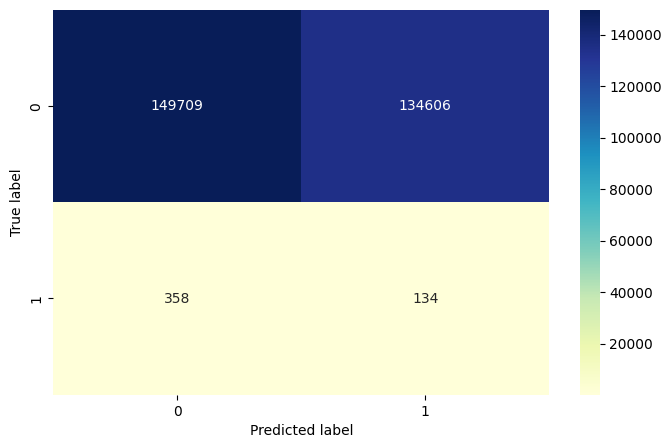

Accuracy Score :  0.53
Recall Score :  0.27
Precision Score :  0.0
F1 Score :  0.0
--------------------------------------------------
If cluster 2 is Fraud and cluster 1 is Non-Fraud:
Confusion Matrix : 


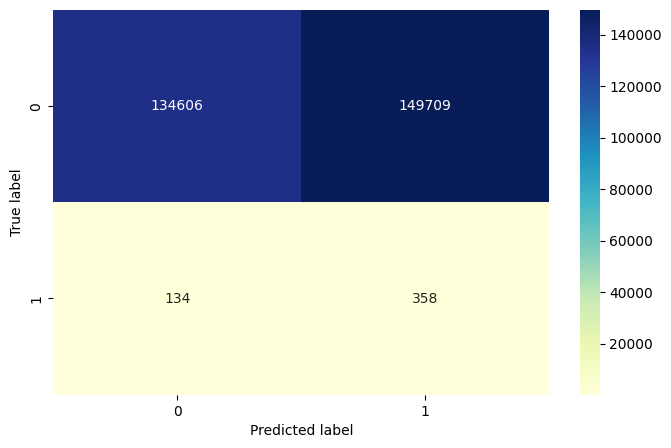

Accuracy Score :  0.47
Recall Score :  0.73
Precision Score :  0.0
F1 Score :  0.0


In [30]:
count_of_class_0_in_cluster_1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==0])
count_of_class_1_in_cluster_1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==1])

count_of_class_0_in_cluster_2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==0])
count_of_class_1_in_cluster_2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==1])

print('count of class 0 in cluster 1 : ', count_of_class_0_in_cluster_1)
print('count of class 1 in cluster 1 : ', count_of_class_1_in_cluster_1)

print('count of class 0 in cluster 2 : ', count_of_class_0_in_cluster_2)
print('count of class 1 in cluster 2 : ', count_of_class_1_in_cluster_2)

print('-'*50)
print('If cluster 1 is Fraud and cluster 2 is Non-Fraud:')
# Confusion Matrix
Tn = count_of_class_0_in_cluster_2
Tp = count_of_class_1_in_cluster_1
Fp = count_of_class_0_in_cluster_1
Fn = count_of_class_1_in_cluster_2

print('Confusion Matrix : ')
plt.figure(figsize = (8,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True,fmt='d',cmap="YlGnBu");
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.show()

accuracy = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracy)
recall = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recall)
precision = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precision)
f1 = round(2*(precision*recall)/(precision+recall),2)
print('F1 Score : ', f1)


print('-'*50)
print('If cluster 2 is Fraud and cluster 1 is Non-Fraud:')
print('Confusion Matrix : ')
Tn = count_of_class_0_in_cluster_1
Tp = count_of_class_1_in_cluster_2
Fp = count_of_class_0_in_cluster_2
Fn = count_of_class_1_in_cluster_1

plt.figure(figsize = (8,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True,fmt='d',cmap="YlGnBu");
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.show()

accuracy  = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracy)
recall = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recall)
precision = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precision)
f1 = round(2*(precision*recall)/(precision+recall),2)
print('F1 Score : ', f1)


In [31]:
cluster1 = new_X[kmeans.labels_==0]
cluster2 = new_X[kmeans.labels_==1]

In [32]:
cluster1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,...,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000,134740.000000
mean,-0.003845,1.456018,-0.545241,-0.479528,0.265288,-0.306820,-0.032999,-0.284066,0.001833,0.198961,...,-0.015346,-0.023366,-0.073691,-0.007112,0.001089,0.122180,0.010289,-0.016191,-0.002098,0.048185
std,0.995519,0.649743,1.020024,1.181940,1.198813,0.971807,1.156835,0.715715,0.393090,0.995061,...,0.517996,0.303496,0.666318,0.325688,0.600061,0.403279,0.495540,0.089420,0.066371,1.008832
min,-1.996583,-14.641710,-28.554825,-16.233798,-3.916031,-40.427726,-4.153568,-11.199975,-12.454357,-5.902828,...,-10.347328,-5.120828,-5.221075,-17.018295,-2.836627,-3.741618,-1.773575,-2.710252,-2.713136,-0.353229
25%,-0.866720,1.143728,-0.929963,-1.344169,-0.576045,-0.916395,-0.743326,-0.712685,-0.204233,-0.377726,...,-0.218487,-0.220889,-0.588843,-0.116533,-0.352200,-0.177095,-0.325340,-0.056224,-0.042788,-0.324443
50%,-0.217620,1.362529,-0.352068,-0.316148,0.317831,-0.362418,-0.291425,-0.248694,-0.029100,0.192829,...,-0.110869,-0.042424,-0.047341,0.006945,0.043227,0.184961,-0.071093,-0.013403,0.000642,-0.239524
75%,0.928326,1.986049,0.042751,0.434345,0.893495,0.213601,0.297883,0.131159,0.172612,0.820607,...,0.040058,0.150818,0.414375,0.151550,0.437418,0.412944,0.241943,0.028399,0.024859,0.006558
max,1.641974,2.454930,7.016714,2.824841,10.343228,5.998306,23.917837,44.054461,4.014722,5.450566,...,17.819507,5.788207,2.527417,7.040028,4.014444,2.520869,3.122747,4.753930,1.422017,40.425011


In [33]:
cluster2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,...,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000,150067.000000
mean,0.003452,-1.307308,0.489554,0.430552,-0.238193,0.275483,0.029628,0.255053,-0.001646,-0.178640,...,0.013779,0.020980,0.066164,0.006386,-0.000978,-0.109701,-0.009238,0.014537,0.001884,-0.043264
std,1.004000,1.813718,1.932455,1.648369,1.547365,1.614693,1.471456,1.518904,1.602663,1.155094,...,0.941614,0.969700,0.769164,0.802964,0.610619,0.586728,0.469762,0.549157,0.450355,0.990014
min,-1.996583,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229
25%,-0.846252,-1.546032,0.015778,-0.336190,-1.129373,-0.376205,-0.793310,-0.225541,-0.216043,-0.781945,...,-0.198494,-0.235215,-0.507369,-0.209111,-0.356869,-0.432343,-0.329634,-0.123455,-0.097262,-0.333279
50%,-0.205228,-0.856244,0.735914,0.713454,-0.384779,0.246920,-0.254628,0.391331,0.103173,-0.255215,...,0.002183,-0.011230,0.082133,-0.032623,0.038986,-0.138915,-0.029566,0.054026,0.051207,-0.281064
75%,0.945009,-0.423055,1.163043,1.465281,0.569884,0.926723,0.504897,0.866619,0.516501,0.342170,...,0.205876,0.219120,0.620765,0.142098,0.441732,0.226295,0.239888,0.230264,0.143838,-0.093354
max,1.642058,1.448939,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243


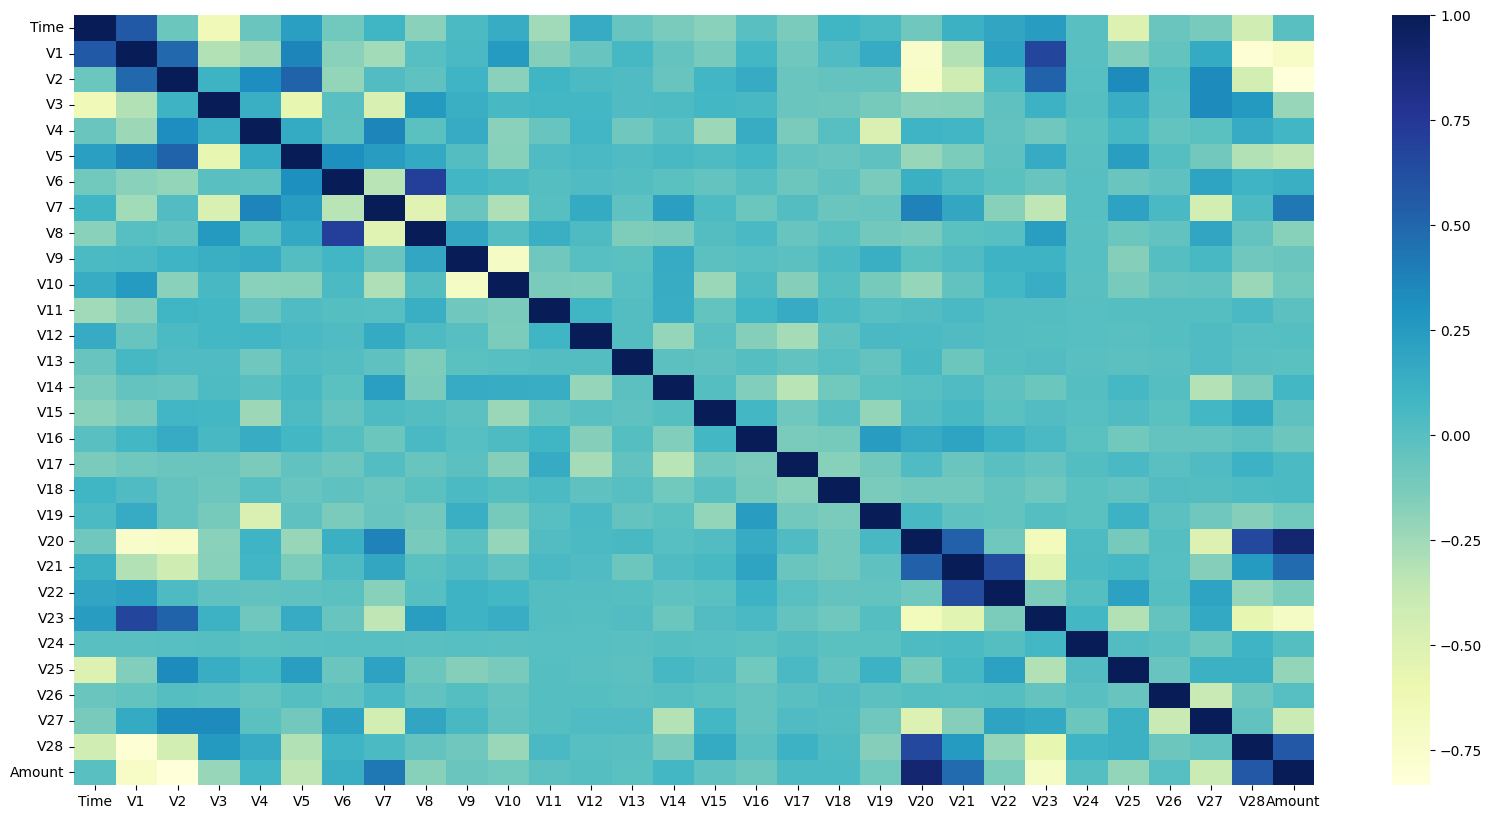

In [34]:
# corelation matrix in cluster 1
plt.figure(figsize=(20,10))
sns.heatmap(cluster1.corr(), annot_kws= {'size': 20}, cmap="YlGnBu")
plt.show()

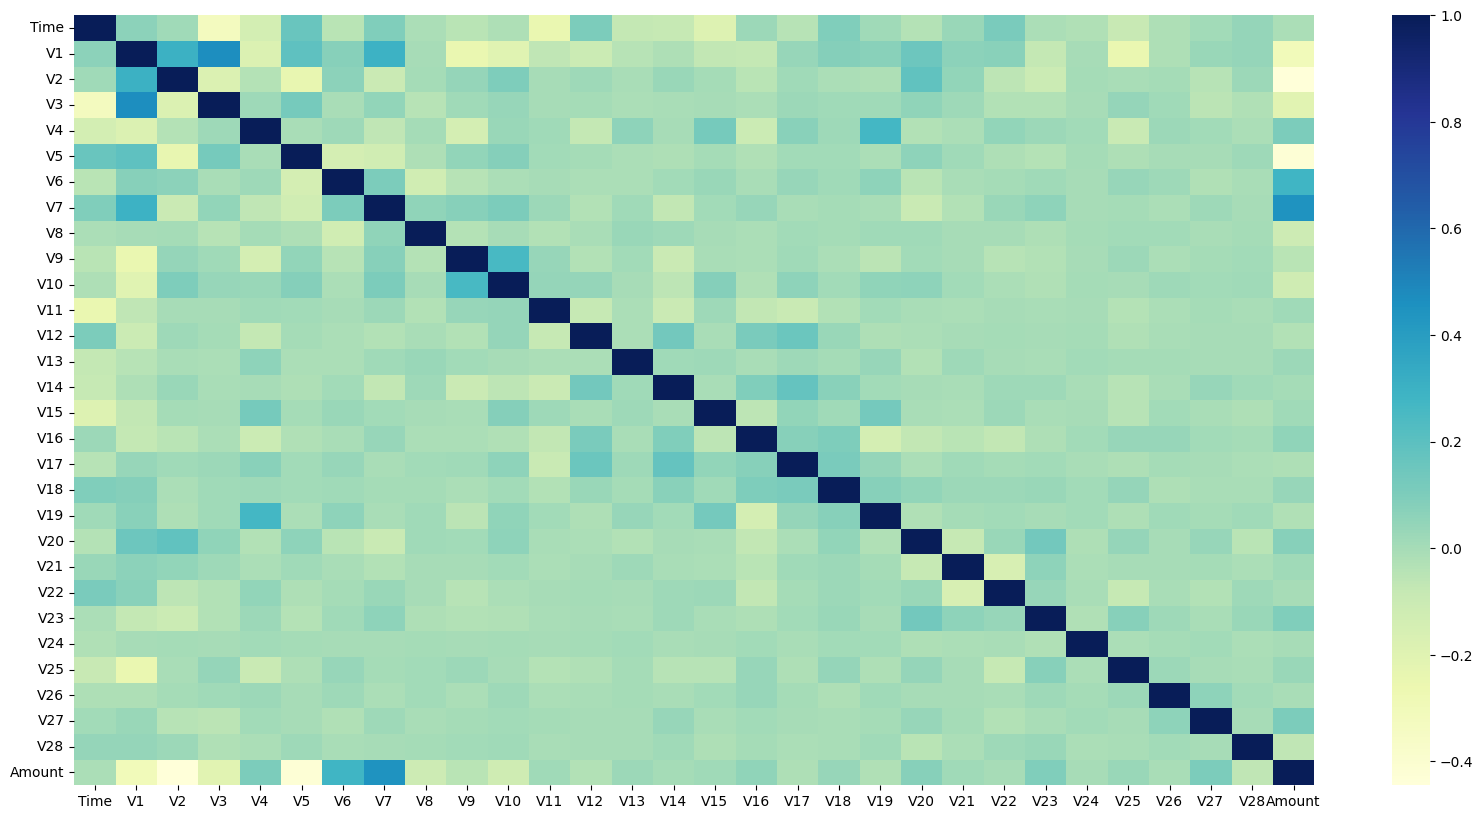

In [35]:
# corelation matrix in cluster 2
plt.figure(figsize=(20,10))
sns.heatmap(cluster2.corr(), annot_kws={'size':20}, cmap="YlGnBu")
plt.show()

# Random forrest classifier with SMOTE

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [39]:
rfc_sm_pred = rfc.predict(X_test)

The classification report of Random Forest Classifier after SMOTE is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443
 

The confusion matrix is below : 


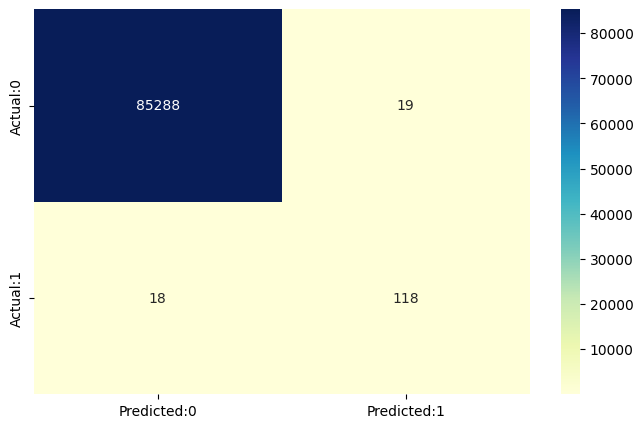

In [40]:
rfc_sm_report = classification_report(y_test, rfc_sm_pred)
print('The classification report of Random Forest Classifier after SMOTE is below : ', '\n\n\n', rfc_sm_report, '\n')

#------------------------------------------------------------------------------
print('The confusion matrix is below : ')
cm=confusion_matrix(y_test, rfc_sm_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");


# XGBOOST

In [44]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_clf = XGBClassifier(random_state=42)


xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
xgb_pred = xgb_clf.predict(X_test)

The classification report of XGBoost Classifier is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443
 

The confusion matrix is below : 


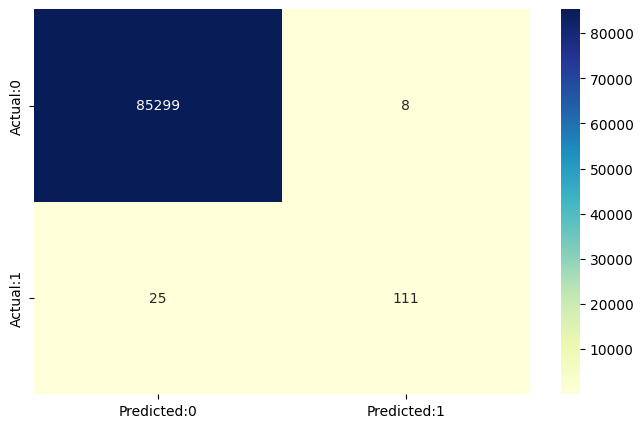

In [46]:
xgd_report = classification_report(y_test, xgb_pred)
print('The classification report of XGBoost Classifier is below : ', '\n\n\n', xgd_report, '\n')

#------------------------------------------------------------------------------
print('The confusion matrix is below : ')
cm=confusion_matrix(y_test, xgb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");